In [31]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import GPy
import math
import pylab as pb
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import geatpy as ea
from hpelm import ELM

In [84]:
dat = pd.read_csv('SH18.csv')
gy = np.array(dat["volume"])[1:132]
LL = np.array(dat["LL"])[1:132]
UU = np.array(dat["UU"])[1:132]
sea = np.array(dat["sea"])[0:131]
f1 = np.array(dat["CIMF1"])[0:131]
f2 = np.array(dat["CIMF2"])[0:131]
f3 = np.array(dat["CIMF3"])[0:131]
f4 = np.array(dat["CIMF4"])[0:131]
f5 = np.array(dat["CR"])[0:131]

gx=np.column_stack((sea,f1,f2,f3,f4,f5,))
gy2=np.column_stack((LL,UU))
gy.resize((131, 1))

seat = np.array(dat["sea"])[131:143]
f1t = np.array(dat["CIMF1"])[131:143]
f2t = np.array(dat["CIMF2"])[131:143]
f3t = np.array(dat["CIMF3"])[131:143]
f4t = np.array(dat["CIMF4"])[131:143]
f5t = np.array(dat["CR"])[131:143]

testt = np.array(dat["volume"])[132:144]
testt.resize((12, 1))

gxt=np.column_stack((seat,f1t,f2t,f3t,f4t,f5t))

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()




In [91]:
dat = pd.read_csv('SH18.csv')
gy = np.array(dat["volume"])[1:132]
LL = np.array(dat["LL"])[1:132]
UU = np.array(dat["UU"])[1:132]
sea = np.array(dat["sea"])[0:131]
f1 = np.array(dat["CIMF1"])[0:131]
f2 = np.array(dat["CIMF2"])[0:131]
f3 = np.array(dat["CIMF3"])[0:131]
f4 = np.array(dat["CIMF4"])[0:131]
f5 = np.array(dat["CR"])[0:131]

gx=np.column_stack((sea,f1,f2,f3,f4,f5,))
gy2=np.column_stack((LL,UU))
gy.resize((131, 1))

seat = np.array(dat["sea"])[131:143]
f1t = np.array(dat["CIMF1"])[131:143]
f2t = np.array(dat["CIMF2"])[131:143]
f3t = np.array(dat["CIMF3"])[131:143]
f4t = np.array(dat["CIMF4"])[131:143]
f5t = np.array(dat["CR"])[131:143]

testt = np.array(dat["volume"])[132:144]
testt.resize((12, 1))

gxt=np.column_stack((seat,f1t,f2t,f3t,f4t,f5t))

scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()

scaler1.fit(gx)
scaler2.fit(gy)
scaler3.fit(gy2)
gx = scaler1.transform(gx)  
gxt = scaler2.transform(gxt)
gy2 = scaler3.transform(gy2)

In [ ]:
gy2 = scaler3.transform(gy2)
bb=scaler3.inverse_transform(reg.predict(gx))

# 1 MLP

## 1.1 用假区间训练模型

In [70]:
reg= MLPRegressor(hidden_layer_sizes=(10, ),max_iter=500)
reg.fit(gx, gy2)
bb=reg.predict(gx)
LOW = []
UP = []

for s in range(0,131):
    if bb[s,0] >= bb[s,1]:
        LOW.append(bb[s,1])
        UP.append(bb[s,0])
    else:
        LOW.append(bb[s,0])
        UP.append(bb[s,1])

ACE = 0
    
for s in range(0,gy.shape[0]):
    if gy[s] >= LOW[s] and gy[s] <= UP[s]:
        eve = 1
    else:
        eve = 0
    ACE = ACE + eve

f1 = ACE/gy.shape[0]
PIW = np.mean(UP)- np.mean(LOW)
f2 = PIW/(max(gy)- min(gy))
print(f1,f2)
print(bb)

0.0 [0.01734906]
[[12.85343426 17.79536184]
 [12.11750147 16.84931721]
 [15.24194313 20.62240892]
 [15.55690699 21.24765592]
 [15.04621408 20.87665985]
 [15.68456865 21.88834029]
 [16.77485129 23.68141508]
 [17.75348727 25.15202066]
 [16.99890233 24.53659212]
 [17.66848378 25.74899583]
 [18.62745036 26.88274502]
 [17.98333497 26.10795266]
 [17.26864181 25.40808881]
 [17.55218786 25.38883039]
 [18.33901087 26.10599869]
 [17.64513307 24.92288199]
 [15.52439869 21.92984158]
 [15.0531413  20.78706565]
 [14.84492142 20.34186111]
 [14.12959272 19.31958139]
 [11.6562422  16.58153783]
 [16.13673445 22.13686261]
 [15.1522698  21.43770908]
 [13.66909656 20.10043676]
 [14.73165697 21.6933242 ]
 [13.82923479 20.7858922 ]
 [15.77946414 23.13123165]
 [17.71780303 25.06923076]
 [16.4631085  23.07633254]
 [12.42907538 17.94636095]
 [15.36183226 21.01754213]
 [16.01215196 21.71778281]
 [15.09188207 20.89097587]
 [16.50914158 23.00832902]
 [18.42845704 25.18081492]
 [14.46390526 20.87970708]
 [13.697930

In [60]:
print(reg.coefs_)
print(reg.intercepts_)

[array([[ 1.06032062, -0.64829704,  0.42933295,  1.29529789, -0.32173496,
         0.76798565,  0.62103108, -0.67601289, -0.26301492,  1.11592811],
       [ 0.58331758, -0.13376649,  0.08875542,  1.04220548, -0.25673449,
         1.27706906,  0.27817489,  0.17598832, -0.56100228,  1.01128394],
       [ 0.06373861, -0.58384929,  0.74290281,  1.31843931,  0.22721707,
         1.10727004,  0.39450995,  0.21493725,  0.4061058 ,  0.59818724],
       [ 1.25638431,  0.3055756 ,  0.39599185,  1.12634701,  0.30422479,
         1.22931405,  1.21163857, -0.70207578, -0.59823751,  0.62954386],
       [ 0.84523809,  0.49458946,  0.78200142,  1.02208782,  0.02526353,
         0.37731812,  0.99274383, -0.07718044,  0.22097369,  1.10449003],
       [ 1.03834195, -0.0698845 ,  1.19312504,  0.70695167, -0.11268051,
         0.62121544,  1.27722675,  0.12267621, -0.15594384,  0.32307397]]), array([[ 0.80882291,  1.17025155],
       [ 0.25327316, -0.65659618],
       [ 0.9338206 ,  1.30014355],
       [-0

## 1.2 真实区间预测

In [72]:
reg= MLPRegressor(hidden_layer_sizes=(10, ),max_iter=500)
reg.fit(gx, gy2)

import geatpy as ea
from multiprocessing.dummy import Pool as ThreadPool
class MyProblem(ea.Problem): # 继承Problem父类
    def __init__(self):
        name = 'MyProblem' # 初始化name（函数名称，可以随意设置）
        M = 2 # 初始化M（目标维数）
        maxormins = [-1,1] # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 92 # 初始化Dim（决策变量维数）
        varTypes = [0]* Dim # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
        lb = [-10000] * Dim # 决策变量下界
        ub = [10000] * Dim # 决策变量上界
        lbin = [1] * Dim # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    
    def aimFunc(self, pop): # 目标函数，采用多线程加速计算
        Vars = pop.Phen # 得到决策变量矩阵
        pop.ObjV = np.zeros((pop.sizes, 2)) # 初始化种群个体目标函数值列向量
        for i in range(0,pop.sizes):
            Q = Vars[i]
            D1=Q[0:60]
            D2=Q[60:80]
            D3=Q[80:90]
            D4=Q[90:92]
            D1 = D1.reshape((6, 10))
            D2 = D2.reshape((10, 2))
            coef=[D1,D2]
            intercept=[D3,D4]
            
            reg.coefs_ = coef
            reg.intercepts_ = intercept
    
            bb=scaler3.inverse_transform(reg.predict(gx))
            LOW = []
            UP = []

            for s in range(0,131):
                if bb[s,0] >= bb[s,1]:
                    LOW.append(bb[s,1])
                    UP.append(bb[s,0])
                else:
                    LOW.append(bb[s,0])
                    UP.append(bb[s,1])

            ACE = 0
    
            for s in range(0,gy.shape[0]):
                if gy[s] >= LOW[s] and gy[s] <= UP[s]:
                     eve = 1
                else:
                     eve = 0
                ACE = ACE + eve

            f1 = ACE/gy.shape[0]
    

            PIW = np.mean(UP)- np.mean(LOW)
            f2 = PIW/(max(gy)- min(gy))
            pop.ObjV[i] = [f1,f2] 


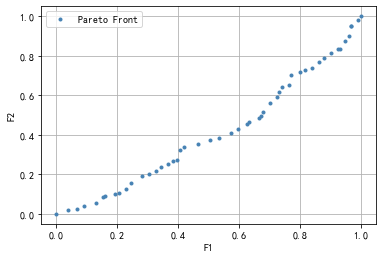

用时：24.014313 秒
评价次数：25000次
非支配个体数：50个
单位时间找到帕累托前沿点个数：2个
种群信息导出完毕。


In [73]:
import geatpy as ea # import geatpy

if __name__ == '__main__':
    """===============================实例化问题对象==========================="""
    problem = MyProblem() # 生成问题对象
    """=================================种群设置==============================="""
    Encoding = 'RI'       # 编码方式
    NIND = 50             # 种群规模
    Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders) # 创建区域描述器
    population = ea.Population(Encoding, Field, NIND) # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
    """===============================算法参数设置============================="""
    myAlgorithm = ea.moea_NSGA2_templet(problem, population) # 实例化一个算法模板对象
    myAlgorithm.MAXGEN = 500 # 最大进化代数
    myAlgorithm.drawing = 1   # 设置绘图方式（0：不绘图；1：绘制结果图；2：绘制过程动画）
    """===========================调用算法模板进行种群进化===========================
    调用run执行算法模板，得到帕累托最优解集NDSet。NDSet是一个种群类Population的对象。
    NDSet.ObjV为最优解个体的目标函数值；NDSet.Phen为对应的决策变量值。
    详见Population.py中关于种群类的定义。
    """
    NDSet = myAlgorithm.run() # 执行算法模板，得到非支配种群
    print('用时：%f 秒'%(myAlgorithm.passTime))
    print('评价次数：%d次'%(myAlgorithm.evalsNum))
    print('非支配个体数：%d个'%(NDSet.sizes))
    print('单位时间找到帕累托前沿点个数：%d个'%(int(NDSet.sizes //myAlgorithm.passTime)))
NDSet.save()

In [74]:
print(NDSet.ObjV[11])

[0.83969466 0.74088734]


In [75]:
Q = NDSet.Phen[11]
D1=Q[0:60]
D2=Q[60:80]
D3=Q[80:90]
D4=Q[90:92]
D1 = D1.reshape((6, 10))
D2 = D2.reshape((10, 2))
coef=[D1,D2]
intercept=[D3,D4]
            
reg.coefs_ = coef
reg.intercepts_ = intercept
    
bb=reg.predict(gx)
print(bb)
print(D4)

[[-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 [-0.99575042  1.00301514]
 

# 2 ELM

In [92]:
Felm = ELM(6, 2)
Felm.add_neurons(10, "sigm")
Felm.train(gx, gy2, "r")
W = Felm.nnet.get_neurons()[0][2]
B = Felm.nnet.get_neurons()[0][3]
bb = scaler3.inverse_transform(Felm.predict(gx))
print(bb)

Telm = ELM(6, 2)
Telm.add_neurons(10, "sigm",W,B)
Telm.train(gx, gy2, "r")


[[282.71773452 368.71773452]
 [276.4528066  362.4528066 ]
 [272.26173644 358.26173644]
 [267.82255208 353.82255208]
 [226.75076671 312.75076671]
 [193.76996261 279.76996261]
 [219.125506   305.125506  ]
 [212.97454947 298.97454947]
 [272.09200928 358.09200928]
 [386.80559078 472.80559078]
 [234.10915973 320.10915973]
 [283.86535319 369.86535319]
 [231.12867765 317.12867765]
 [272.74602538 358.74602538]
 [257.16988628 343.16988628]
 [242.0359411  328.0359411 ]
 [210.15432055 296.15432055]
 [195.84477329 281.84477329]
 [214.15316987 300.15316987]
 [233.30626206 319.30626206]
 [276.62866243 362.62866243]
 [206.89282241 292.89282241]
 [131.75155665 217.75155665]
 [195.79183706 281.79183706]
 [218.50046703 304.50046703]
 [227.35085659 313.35085659]
 [271.0710448  357.0710448 ]
 [155.25521369 241.25521369]
 [133.06088219 219.06088219]
 [253.30477567 339.30477567]
 [292.43124021 378.43124021]
 [355.36143098 441.36143098]
 [280.70234094 366.70234094]
 [274.54480044 360.54480044]
 [347.79922732

In [86]:
Felm = ELM(6, 2)
Felm.add_neurons(10, "sigm")
Felm.train(gx, gy2, "r")
W = Felm.nnet.get_neurons()[0][2]
B = Felm.nnet.get_neurons()[0][3]


Telm = ELM(6, 2)
Telm.add_neurons(10, "sigm",W,B)
Telm.train(gx, gy2, "r")

In [ ]:
reg= MLPRegressor(hidden_layer_sizes=(10, ),max_iter=500)
reg.fit(gx, gy2)

import geatpy as ea
from multiprocessing.dummy import Pool as ThreadPool
class MyProblem(ea.Problem): # 继承Problem父类
    def __init__(self):
        name = 'MyProblem' # 初始化name（函数名称，可以随意设置）
        M = 2 # 初始化M（目标维数）
        maxormins = [-1,1] # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 92 # 初始化Dim（决策变量维数）
        varTypes = [0]* Dim # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
        lb = [-10000] * Dim # 决策变量下界
        ub = [10000] * Dim # 决策变量上界
        lbin = [1] * Dim # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    
    def aimFunc(self, pop): # 目标函数，采用多线程加速计算
        Vars = pop.Phen # 得到决策变量矩阵
        pop.ObjV = np.zeros((pop.sizes, 2)) # 初始化种群个体目标函数值列向量
        for i in range(0,pop.sizes):
            Q = Vars[i]
            SB = Q.reshape((10, 2))
            
            Telm.nnet.set_B(SB)
    
            bb=scaler3.inverse_transform(Telm.predict(gx))
            LOW = []
            UP = []

            for s in range(0,131):
                if bb[s,0] >= bb[s,1]:
                    LOW.append(bb[s,1])
                    UP.append(bb[s,0])
                else:
                    LOW.append(bb[s,0])
                    UP.append(bb[s,1])

            ACE = 0
    
            for s in range(0,gy.shape[0]):
                if gy[s] >= LOW[s] and gy[s] <= UP[s]:
                     eve = 1
                else:
                     eve = 0
                ACE = ACE + eve

            f1 = ACE/gy.shape[0]
    

            PIW = np.mean(UP)- np.mean(LOW)
            f2 = PIW/(max(gy)- min(gy))
            pop.ObjV[i] = [f1,f2] 


In [ ]:
bb=scaler3.inverse_transform(

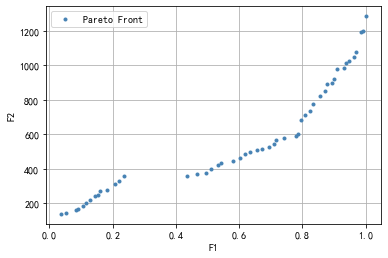

用时：22.087962 秒
评价次数：25000次
非支配个体数：50个
单位时间找到帕累托前沿点个数：2个
种群信息导出完毕。


In [94]:
import geatpy as ea # import geatpy

if __name__ == '__main__':
    """===============================实例化问题对象==========================="""
    problem = MyProblem() # 生成问题对象
    """=================================种群设置==============================="""
    Encoding = 'RI'       # 编码方式
    NIND = 50             # 种群规模
    Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders) # 创建区域描述器
    population = ea.Population(Encoding, Field, NIND) # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
    """===============================算法参数设置============================="""
    myAlgorithm = ea.moea_NSGA2_templet(problem, population) # 实例化一个算法模板对象
    myAlgorithm.MAXGEN = 500 # 最大进化代数
    myAlgorithm.drawing = 1   # 设置绘图方式（0：不绘图；1：绘制结果图；2：绘制过程动画）
    """===========================调用算法模板进行种群进化===========================
    调用run执行算法模板，得到帕累托最优解集NDSet。NDSet是一个种群类Population的对象。
    NDSet.ObjV为最优解个体的目标函数值；NDSet.Phen为对应的决策变量值。
    详见Population.py中关于种群类的定义。
    """
    NDSet = myAlgorithm.run() # 执行算法模板，得到非支配种群
    print('用时：%f 秒'%(myAlgorithm.passTime))
    print('评价次数：%d次'%(myAlgorithm.evalsNum))
    print('非支配个体数：%d个'%(NDSet.sizes))
    print('单位时间找到帕累托前沿点个数：%d个'%(int(NDSet.sizes //myAlgorithm.passTime)))
NDSet.save()

In [89]:
print(NDSet.ObjV[13])

[0.51908397 0.35263527]


In [90]:
Q = NDSet.Phen[13]
SB = Q.reshape((10, 2))

Telm.nnet.set_B(SB)

bb=Telm.predict(gx)
print(bb)

[[301.04269642 438.81989237]
 [354.88914287 335.20952391]
 [259.38226037 428.7338272 ]
 [281.15910019 434.00621163]
 [301.66039116 438.96975832]
 [301.86996051 439.02049702]
 [192.54746978 412.55254108]
 [117.50921398 394.38510605]
 [264.92539698 430.07588669]
 [299.60722896 438.47266941]
 [302.08776671 439.07322986]
 [ 52.09352086  75.71597617]
 [415.54317637 223.09848233]
 [301.75362273 438.5875576 ]
 [302.08777157 439.07323103]
 [302.08776935 439.0732305 ]
 [302.08775748 439.07322714]
 [302.08496195 439.0725508 ]
 [123.43687006 395.82024477]
 [106.59143472 391.74181372]
 [106.65482344 391.7571607 ]
 [144.80404171 400.99342875]
 [302.0868934  439.07301842]
 [415.66606986 222.86454057]
 [302.08774316 439.07322412]
 [415.66429548 222.86789261]
 [302.08768792 439.07321078]
 [302.08765018 439.07320164]
 [302.08338521 439.07216905]
 [284.32396383 434.77244523]
 [106.59314123 391.74222688]
 [106.59729587 391.74323276]
 [285.60313851 435.08215346]
 [302.0832416  439.07213429]
 [302.08723692

In [47]:
print(Felm.predict(gx))

[[361.83503672 447.83503672]
 [361.11710971 447.11710971]
 [361.92452825 447.92452825]
 [361.92490417 447.92490417]
 [361.9249041  447.9249041 ]
 [361.92490394 447.92490394]
 [361.92464618 447.92464618]
 [356.82987773 442.82987773]
 [361.92485855 447.92485855]
 [351.06352207 437.06352207]
 [361.92441077 447.92441077]
 [189.20794439 275.20794439]
 [361.92415103 447.92415103]
 [313.11004816 399.11004815]
 [360.75982904 446.75982904]
 [361.2674729  447.2674729 ]
 [301.10301997 387.10301996]
 [302.76470848 388.76470847]
 [361.26750987 447.26750987]
 [352.78403414 438.78403414]
 [338.83535249 424.83535249]
 [355.50968728 441.50968728]
 [300.81128702 386.81128701]
 [182.12983286 268.12983305]
 [301.1979755  387.19797549]
 [340.84320189 426.84320189]
 [349.63374662 435.63374662]
 [345.6411065  431.6411065 ]
 [313.30016417 399.30016416]
 [349.73147103 435.73147103]
 [361.92490417 447.92490417]
 [361.92490417 447.92490417]
 [361.92490417 447.92490417]
 [351.06847648 437.06847648]
 [313.10576191

# 草稿

In [15]:
print(gy)


[[196.64]
 [238.37]
 [242.73]
 [231.1 ]
 [235.19]
 [255.86]
 [267.6 ]
 [252.1 ]
 [258.97]
 [253.82]
 [233.03]
 [229.53]
 [231.8 ]
 [252.58]
 [251.75]
 [230.47]
 [230.  ]
 [245.17]
 [245.25]
 [214.88]
 [260.6 ]
 [234.5 ]
 [207.44]
 [225.13]
 [215.98]
 [247.52]
 [275.19]
 [267.82]
 [234.79]
 [286.76]
 [299.95]
 [283.88]
 [299.36]
 [306.57]
 [262.06]
 [265.99]
 [285.97]
 [301.12]
 [320.75]
 [325.23]
 [333.58]
 [392.93]
 [400.87]
 [390.68]
 [388.29]
 [332.  ]
 [298.28]
 [320.74]
 [305.42]
 [334.74]
 [338.22]
 [345.01]
 [334.21]
 [380.66]
 [390.65]
 [372.64]
 [377.62]
 [330.46]
 [328.95]
 [371.62]
 [324.08]
 [363.58]
 [374.1 ]
 [380.07]
 [368.64]
 [409.47]
 [418.14]
 [397.23]
 [383.55]
 [343.55]
 [341.16]
 [353.14]
 [376.24]
 [400.02]
 [384.9 ]
 [371.98]
 [383.06]
 [438.11]
 [449.59]
 [412.52]
 [409.58]
 [374.2 ]
 [365.65]
 [414.93]
 [391.51]
 [395.16]
 [420.06]
 [413.99]
 [411.32]
 [471.46]
 [483.64]
 [437.74]
 [463.58]
 [434.23]
 [427.57]
 [432.77]
 [479.71]
 [501.2 ]
 [503.78]
 [505.18]


In [92]:
import geatpy as ea
from multiprocessing.dummy import Pool as ThreadPool
class MyProblem(ea.Problem): # 继承Problem父类
    def __init__(self):
        name = 'MyProblem' # 初始化name（函数名称，可以随意设置）
        M = 2 # 初始化M（目标维数）
        maxormins = [-1,1] # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 92 # 初始化Dim（决策变量维数）
        varTypes = [0]* Dim # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
        lb = [-10000] * Dim # 决策变量下界
        ub = [10000] * Dim # 决策变量上界
        lbin = [1] * Dim # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    
    def aimFunc(self, pop): # 目标函数，采用多线程加速计算
        Vars = pop.Phen # 得到决策变量矩阵
        pop.ObjV = np.zeros((pop.sizes, 2)) # 初始化种群个体目标函数值列向量
        for i in range(0,pop.sizes):
            Q = Vars[i]
            model.set_weights(Q)
    
            bb=model.predict(gx)
            LOW = []
            UP = []

            for s in range(0,131):
                if bb[s,0] >= bb[s,1]:
                    LOW.append(bb[s,1])
                    UP.append(bb[s,0])
                else:
                    LOW.append(bb[s,0])
                    UP.append(bb[s,1])

            ACE = 0
    
            for s in range(0,gy.shape[0]):
                if gy[s] >= LOW[s] and gy[s] <= UP[s]:
                     eve = 1
                else:
                     eve = 0
                ACE = ACE + eve

            f1 = ACE/gy.shape[0]
    

            PIW = np.mean(UP)- np.mean(LOW)
            f2 = PIW/(max(gy)- min(gy))
            pop.ObjV[i] = [f1,f2] 


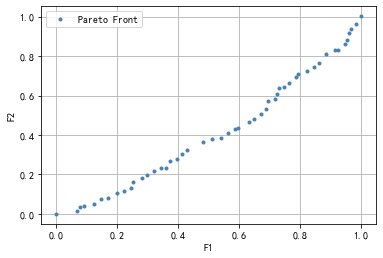

用时：20.987032 秒
评价次数：25000次
非支配个体数：50个
单位时间找到帕累托前沿点个数：2个


In [93]:
import numpy as np
import geatpy as ea # import geatpy

if __name__ == '__main__':
    """===============================实例化问题对象==========================="""
    problem = MyProblem() # 生成问题对象
    """=================================种群设置==============================="""
    Encoding = 'RI'       # 编码方式
    NIND = 50             # 种群规模
    Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders) # 创建区域描述器
    population = ea.Population(Encoding, Field, NIND) # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
    """===============================算法参数设置============================="""
    myAlgorithm = ea.moea_NSGA2_templet(problem, population) # 实例化一个算法模板对象
    myAlgorithm.MAXGEN = 500 # 最大进化代数
    myAlgorithm.drawing = 1   # 设置绘图方式（0：不绘图；1：绘制结果图；2：绘制过程动画）
    """===========================调用算法模板进行种群进化===========================
    调用run执行算法模板，得到帕累托最优解集NDSet。NDSet是一个种群类Population的对象。
    NDSet.ObjV为最优解个体的目标函数值；NDSet.Phen为对应的决策变量值。
    详见Population.py中关于种群类的定义。
    """
    NDSet = myAlgorithm.run() # 执行算法模板，得到非支配种群
    print('用时：%f 秒'%(myAlgorithm.passTime))
    print('评价次数：%d次'%(myAlgorithm.evalsNum))
    print('非支配个体数：%d个'%(NDSet.sizes))
    print('单位时间找到帕累托前沿点个数：%d个'%(int(NDSet.sizes //myAlgorithm.passTime)))

In [94]:
NDSet.save()

种群信息导出完毕。


In [96]:
print(NDSet.ObjV[12])

[0.78625954 0.69448223]


In [76]:
print(gx)

[[2.35133476e-01 3.85371454e-01 5.12468037e-01 1.82418903e-02
  7.62919956e-01 0.00000000e+00]
 [1.74020973e-01 3.53527127e-01 4.68221410e-01 0.00000000e+00
  7.65961992e-01 5.22021695e-04]
 [4.53240737e-01 6.72761675e-01 5.11609659e-01 1.97125810e-02
  7.64743596e-01 1.14727014e-03]
 [5.36734520e-01 5.12881680e-01 5.72820691e-01 7.65096594e-02
  7.59257284e-01 1.87260554e-03]
 [4.19099736e-01 4.36762171e-01 5.90143984e-01 1.68239536e-01
  7.49593666e-01 2.69973593e-03]
 [3.91909381e-01 5.74102024e-01 5.33377944e-01 2.90099011e-01
  7.35847991e-01 3.62973753e-03]
 [6.71722522e-01 4.65637962e-01 4.16291700e-01 4.28519241e-01
  7.18116556e-01 4.66352746e-03]
 [7.44056026e-01 6.02794474e-01 3.07357754e-01 5.65032492e-01
  6.96495724e-01 5.80201233e-03]
 [5.96674239e-01 5.18892148e-01 3.01886741e-01 6.83294360e-01
  6.71082046e-01 7.04606992e-03]
 [6.93380217e-01 3.45354462e-01 4.23518610e-01 7.77608363e-01
  6.41972237e-01 8.39655381e-03]
 [4.06804418e-01 6.83041644e-01 6.38620975e-01 8.4

In [98]:
model.set_weights(NDSet.Phen[12])
bb=model.predict(gxt)

print(bb)

[[229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]
 [229.33007028 529.42973206]]


In [11]:
model.set_weights(NDSet.Phen[16])
bb=model.predict(gxt)
LOW = []
UP = []

for s in range(0,12):
    if bb[s,0] >= bb[s,1]:
        LOW.append(bb[s,1])
        UP.append(bb[s,0])
    else:
        LOW.append(bb[s,0])
        UP.append(bb[s,1])

ACE = 0
    
for s in range(0,12):
    if testt[s] >= LOW[s] and testt[s] <= UP[s]:
        eve = 1
    else:
        eve = 0
    ACE = ACE + eve

PICP = ACE/12
    

PIW = np.mean(UP)- np.mean(LOW)
PINAW= PIW/(max(testt)- min(testt))
print(PICP,PINAW)

0.4166666666666667 [4.73703961]


In [17]:
model.set_weights(NDSet.Phen[6])
bb=model.predict(gx)
LOW = []
UP = []

for s in range(0,131):
    if bb[s,0] >= bb[s,1]:
        LOW.append(bb[s,1])
        UP.append(bb[s,0])
    else:
        LOW.append(bb[s,0])
        UP.append(bb[s,1])

ACE = 0
    
for s in range(0,131):
    if gy[s] >= LOW[s] and gy[s] <= UP[s]:
        eve = 1
    else:
        eve = 0
    ACE = ACE + eve

PICP = ACE/gy.shape[0]
    

PIW = np.mean(UP)- np.mean(LOW)
PINAW= PIW/(max(gy)- min(gy))
print(PICP,PINAW)

0.0 [1.63703698e-05]


In [18]:
print(bb)

[[291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851 291.08727454]
 [291.09434851

In [ ]:
------------------------------------------------------------------------------------

In [23]:
import geatpy as ea
from multiprocessing.dummy import Pool as ThreadPool
class MyProblem(ea.Problem): # 继承Problem父类
    def __init__(self):
        name = 'MyProblem' # 初始化name（函数名称，可以随意设置）
        M = 2 # 初始化M（目标维数）
        maxormins = [-1,1] # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 92 # 初始化Dim（决策变量维数）
        varTypes = [0]* Dim # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
        lb = [-10000] * Dim # 决策变量下界
        ub = [10000] * Dim # 决策变量上界
        lbin = [1] * Dim # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    
    def aimFunc(self, pop): # 目标函数，采用多线程加速计算
        Vars = pop.Phen # 得到决策变量矩阵
        pop.ObjV = np.zeros((pop.sizes, 2)) # 初始化种群个体目标函数值列向量
        def subAimFunc(i):
            Q = Vars[i]
            model.set_weights(Q)
    
            bb=model.predict(gx)
            LOW = []
            UP = []

            for s in range(0,131):
                if bb[s,0] >= bb[s,1]:
                    LOW.append(bb[s,1])
                    UP.append(bb[s,0])
                else:
                    LOW.append(bb[s,0])
                    UP.append(bb[s,1])

            ACE = 0
    
            for s in range(0,gy.shape[0]):
                if gy[s] >= LOW[s] and gy[s] <= UP[s]:
                     eve = 1
                else:
                     eve = 0
                ACE = ACE + eve

            f1 = ACE/gy.shape[0]
    

            PIW = np.mean(UP)- np.mean(LOW)
            f2 = PIW/(max(gy)- min(gy))
            pop.ObjV[i] = [f1,f2] # 把交叉验证的平均得分作为目标函数值
            
        pool = ThreadPool(4) # 设置池的大小
        pool.map(subAimFunc, list(range(pop.sizes)))




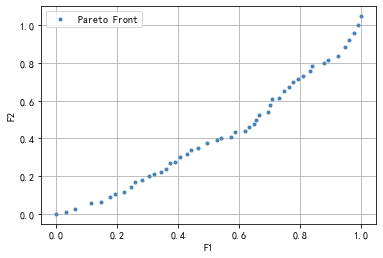

用时：343.734678 秒
评价次数：25000次
非支配个体数：50个
单位时间找到帕累托前沿点个数：0个


In [38]:
import numpy as np
import geatpy as ea # import geatpy

if __name__ == '__main__':
    """===============================实例化问题对象==========================="""
    problem = MyProblem() # 生成问题对象
    """=================================种群设置==============================="""
    Encoding = 'RI'       # 编码方式
    NIND = 50             # 种群规模
    Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders) # 创建区域描述器
    population = ea.Population(Encoding, Field, NIND) # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
    """===============================算法参数设置============================="""
    myAlgorithm = ea.moea_NSGA2_templet(problem, population) # 实例化一个算法模板对象
    myAlgorithm.MAXGEN = 500 # 最大进化代数
    myAlgorithm.drawing = 1   # 设置绘图方式（0：不绘图；1：绘制结果图；2：绘制过程动画）
    """===========================调用算法模板进行种群进化===========================
    调用run执行算法模板，得到帕累托最优解集NDSet。NDSet是一个种群类Population的对象。
    NDSet.ObjV为最优解个体的目标函数值；NDSet.Phen为对应的决策变量值。
    详见Population.py中关于种群类的定义。
    """
    NDSet = myAlgorithm.run() # 执行算法模板，得到非支配种群
    print('用时：%f 秒'%(myAlgorithm.passTime))
    print('评价次数：%d次'%(myAlgorithm.evalsNum))
    print('非支配个体数：%d个'%(NDSet.sizes))
    print('单位时间找到帕累托前沿点个数：%d个'%(int(NDSet.sizes //myAlgorithm.passTime)))


In [ ]:
----------------------------------------------------------------------------------

In [14]:
dat = pd.read_csv('SH18.csv')
gy = np.array(dat["seares"])[1:132]
f1 = np.array(dat["CIMF1"])[0:131]
f2 = np.array(dat["CIMF2"])[0:131]
f3 = np.array(dat["CIMF3"])[0:131]
f4 = np.array(dat["CIMF4"])[0:131]
f5 = np.array(dat["CR"])[0:131]

gx=np.column_stack((f1,f2,f3,f4,f5,))
gy.resize((131, 1))

f1t = np.array(dat["CIMF1"])[131:143]
f2t = np.array(dat["CIMF2"])[131:143]
f3t = np.array(dat["CIMF3"])[131:143]
f4t = np.array(dat["CIMF4"])[131:143]
f5t = np.array(dat["CR"])[131:143]

testt = np.array(dat["seares"])[132:144]
testt.resize((12, 1))

gxt=np.column_stack((f1t,f2t,f3t,f4t,f5t))

ndim = [5, 10, 2]
model = MLPNetwork(ndim, act_funcs=["tanh", "linear"], cost_function="mse")
model.initialize_weights()

In [16]:
import geatpy as ea
from multiprocessing.dummy import Pool as ThreadPool
class MyProblem(ea.Problem): # 继承Problem父类
    def __init__(self):
        name = 'MyProblem' # 初始化name（函数名称，可以随意设置）
        M = 2 # 初始化M（目标维数）
        maxormins = [-1,1] # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 82 # 初始化Dim（决策变量维数）
        varTypes = [0]* Dim # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
        lb = [-10000] * Dim # 决策变量下界
        ub = [10000] * Dim # 决策变量上界
        lbin = [1] * Dim # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    
    def aimFunc(self, pop): # 目标函数，采用多线程加速计算
        Vars = pop.Phen # 得到决策变量矩阵
        pop.ObjV = np.zeros((pop.sizes, 2)) # 初始化种群个体目标函数值列向量
        def subAimFunc(i):
            Q = Vars[i]
            model.set_weights(Q)
    
            bb=model.predict(gx)
            LOW = []
            UP = []

            for s in range(0,131):
                if bb[s,0] >= bb[s,1]:
                    LOW.append(bb[s,1])
                    UP.append(bb[s,0])
                else:
                    LOW.append(bb[s,0])
                    UP.append(bb[s,1])

            ACE = 0
    
            for s in range(0,gy.shape[0]):
                if gy[s] >= LOW[s] and gy[s] <= UP[s]:
                     eve = 1
                else:
                     eve = 0
                ACE = ACE + eve

            f1 = ACE/gy.shape[0]
    

            PIW = np.mean(UP)- np.mean(LOW)
            f2 = PIW/(max(gy)- min(gy))
            pop.ObjV[i] = [f1,f2] # 把交叉验证的平均得分作为目标函数值
            
        pool = ThreadPool(4) # 设置池的大小
        pool.map(subAimFunc, list(range(pop.sizes)))



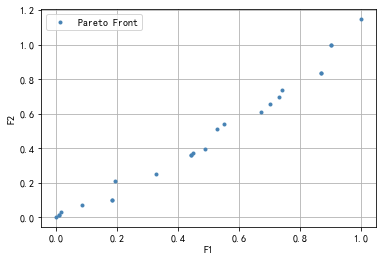

用时：72.217171 秒
评价次数：30000次
非支配个体数：24个
单位时间找到帕累托前沿点个数：0个


In [20]:
import numpy as np
import geatpy as ea # import geatpy

if __name__ == '__main__':
    """===============================实例化问题对象==========================="""
    problem = MyProblem() # 生成问题对象
    """=================================种群设置==============================="""
    Encoding = 'RI'       # 编码方式
    NIND = 100             # 种群规模
    Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders) # 创建区域描述器
    population = ea.Population(Encoding, Field, NIND) # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
    """===============================算法参数设置============================="""
    myAlgorithm = ea.moea_NSGA2_templet(problem, population) # 实例化一个算法模板对象
    myAlgorithm.MAXGEN = 300 # 最大进化代数
    myAlgorithm.drawing = 1   # 设置绘图方式（0：不绘图；1：绘制结果图；2：绘制过程动画）
    """===========================调用算法模板进行种群进化===========================
    调用run执行算法模板，得到帕累托最优解集NDSet。NDSet是一个种群类Population的对象。
    NDSet.ObjV为最优解个体的目标函数值；NDSet.Phen为对应的决策变量值。
    详见Population.py中关于种群类的定义。
    """
    NDSet = myAlgorithm.run() # 执行算法模板，得到非支配种群
    print('用时：%f 秒'%(myAlgorithm.passTime))
    print('评价次数：%d次'%(myAlgorithm.evalsNum))
    print('非支配个体数：%d个'%(NDSet.sizes))
    print('单位时间找到帕累托前沿点个数：%d个'%(int(NDSet.sizes //myAlgorithm.passTime)))



In [ ]:
--------------------------------------------------------------------------------

In [2]:
import numpy as np
a=np.arange(9).reshape(3,3)
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [10]:
b = a[:, [0]]
c=a[:, [1]]
print(b)

[[0]
 [3]
 [6]]


In [11]:
f1 = -25 * (b - 2)**2 - (c - 2)**2
f2 = (b - 1)**2 + (c - 1)**2
print(f1)

[[-101]
 [ -29]
 [-425]]


In [12]:
ObjV = np.hstack([f1, f2])
print(ObjV)

[[-101    1]
 [ -29   13]
 [-425   61]]


In [13]:
m=a[1]
print(m)

[3 4 5]


In [14]:
ObjV = np.zeros((3,2 ))
a=1 
b=2
ObjV[0]=[a,b]
print(ObjV)

[[1. 2.]
 [0. 0.]
 [0. 0.]]


In [24]:
xxx = np.zeros((3,2 ))
print(xxx)
a=1 
b=2
xxx[0]=[a,b]
xxx[1]=[a,b]
print(xxx)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 2.]
 [1. 2.]
 [0. 0.]]


In [39]:
    #计算指标
    NDSet.save()
    PF = problem.getReferObjV()#获取真实前沿
    if PF is not None and NDSet.sizes != 0:
        GD = ea.indicator.GD(NDSet.ObjV, PF)#计算GD指标
        IGD = ea.indicator.IGD(NDSet.ObjV, PF)#计算IGD指标
        HV = ea.indicator.HV(NDSet.ObjV, PF)#计算HV指标
        Spacing = ea.indicator.Spacing(NDSet.ObjV)#计算Spacing指标print('GD:%f'%GD)
        print('IGD:%f'%IGD)
        print('HV:%f'%HV)
        print('Spacing:%f'%Spacing)
        """=====================进化过程指标追踪分析========================"""
    if PF is not None:
        metricName = [['IGD'], ['HV']]
        [NDSet_trace, Metrics] =ea.indicator.moea_tracking(myAlgorithm.pop_trace, PF,metricName, problem.maxormins)
        #绘制指标追踪分析图
        ea.trcplot(Metrics, labels = metricName, titles = metricName)

种群信息导出完毕。
未找到目标函数参考值数据！


In [40]:
print(NDSet.Phen[3])

[ -5994.01242284  -2679.87467851   4484.33312617    -21.15489485
   6946.70678884    -33.75988554   3447.40639316  -4076.45694166
   9998.94907404   3449.10765252  -5528.91577907   4480.81704401
   1143.66587401  -2696.96172719  -5475.51907989  -6344.26685613
   2296.17782459  -4869.28148143   9286.38527429   3772.72159917
   7089.68410605  -5137.43401532   3977.16865534   7357.71629238
   4706.8947626    3593.7054406    2999.48101927    762.82678107
  -7608.00359768   -365.28448347   5848.55424781   7125.36749243
   2052.47791067   9165.09431141   4105.28866452   7364.50649815
  -6547.14351012  -6061.07308187   2281.34561599  -6411.54287189
  -6791.02573789  -4059.34827983   4381.64161349  -8450.38883407
   1738.96455165  -2249.56127668  -1703.77935175  -2535.62990904
  -8780.04587594   1651.50040799  -8843.21896702   2595.35847151
   1654.39093635   9343.02005155  -6592.32257602  -9378.80149004
  -7173.45283686  -7860.14105863   7269.22052728   5825.84814929
     99.56058138   7879.9

In [46]:
model.set_weights(NDSet.Phen[2])
bb=model.predict(gxt)
LOW = []
UP = []

for s in range(0,12):
    if bb[s,0] >= bb[s,1]:
        LOW.append(bb[s,1])
        UP.append(bb[s,0])
    else:
        LOW.append(bb[s,0])
        UP.append(bb[s,1])

ACE = 0
    
for s in range(0,12):
    if testt[s] >= LOW[s] and testt[s] <= UP[s]:
        eve = 1
    else:
        eve = 0
    ACE = ACE + eve

PICP = ACE/12
    

PIW = np.mean(UP)- np.mean(LOW)
PINAW= PIW/(max(testt)- min(testt))
print(PICP,PINAW)

1.0 [39.96541971]


In [50]:
model.set_weights(NDSet.Phen[38])
bb=model.predict(gx)
LOW = []
UP = []

for s in range(0,131):
    if bb[s,0] >= bb[s,1]:
        LOW.append(bb[s,1])
        UP.append(bb[s,0])
    else:
        LOW.append(bb[s,0])
        UP.append(bb[s,1])

ACE = 0
    
for s in range(0,131):
    if gy[s] >= LOW[s] and gy[s] <= UP[s]:
        eve = 1
    else:
        eve = 0
    ACE = ACE + eve

PICP = ACE/gy.shape[0]
    

PIW = np.mean(UP)- np.mean(LOW)
PINAW= PIW/(max(gy)- min(gy))
print(PICP,PINAW)

0.0 [37.27933105]


In [55]:
print(NDSet.Phen[38])
print(bb)

[-6227.8191631  -1772.23391612  4167.37742397  -996.03615685
  6942.41441213 -1470.20463583  3915.27112397 -4113.90216976
  9585.69912848  3504.97280727 -5525.3578667   4480.87963646
  1209.02027346 -2529.03750905 -5564.32323911 -6221.65966046
  2127.90285232 -4865.27614556  9287.28793939  3773.97730839
  6092.79832229  5643.38511321  4051.11978485  6567.56554238
  5026.93105339  3584.66329904  2871.34666806   861.11038825
 -7666.09813974 -3341.24974328  4975.38671021  7234.14189569
  2024.80763674 -3668.11755762  4104.074814    7354.48484514
 -6701.45813435 -6060.60941658  2908.655612   -5857.32481938
 -6791.00945753 -4032.78943074  4342.40218089 -8450.38883407
  7860.59634938 -2255.4005076  -1697.98737332 -3694.69693992
 -8508.73501567  2159.89958689 -8413.31757379  8413.5715768
  1626.57348763  9342.96591403 -6671.27469298 -9204.45467275
 -7315.48698519 -8559.71887593  7272.98248621 -3456.14229673
  -234.21208728  8160.72227851  5728.9216613   4599.523403
 -1269.0550516  -8128.05073

In [57]:
Vars =  NDSet.Phen
Q = Vars[38]
model.set_weights(Q)
    
bb=model.predict(gx)
LOW = []
UP = []

for s in range(0,131):
    if bb[s,0] >= bb[s,1]:
        LOW.append(bb[s,1])
        UP.append(bb[s,0])
    else:
        LOW.append(bb[s,0])
        UP.append(bb[s,1])

ACE = 0
    
for s in range(0,gy.shape[0]):
    if gy[s] >= LOW[s] and gy[s] <= UP[s]:
        eve = 1
    else:
        eve = 0
    ACE = ACE + eve

f1 = ACE/gy.shape[0]
    
PIW = np.mean(UP)- np.mean(LOW)
f2 = PIW/(max(gy)- min(gy))

print(f1,f2)

0.0 [37.27933105]


In [58]:
            Vars =  NDSet.Phen
            Q = Vars[38]
            model.set_weights(Q)
    
            bb=model.predict(gx)
            LOW = []
            UP = []

            for s in range(0,131):
                if bb[s,0] >= bb[s,1]:
                    LOW.append(bb[s,1])
                    UP.append(bb[s,0])
                else:
                    LOW.append(bb[s,0])
                    UP.append(bb[s,1])

            ACE = 0
    
            for s in range(0,gy.shape[0]):
                if gy[s] >= LOW[s] and gy[s] <= UP[s]:
                     eve = 1
                else:
                     eve = 0
                ACE = ACE + eve

            f1 = ACE/gy.shape[0]
    

            PIW = np.mean(UP)- np.mean(LOW)
            f2 = PIW/(max(gy)- min(gy))
            print(f1,f2)

0.0 [37.27933105]
